In [2]:
%load_ext autoreload
%autoreload 2

#Setting Up and Importing the Necessary Packages/Libraries
##Package for reading in Bruker OPUS type files
from brukeropusreader import read_file
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import pathlib
import numpy as np
import pandas as pd
#Local Functions
from hydrogenase_processing.cut_range import cut_range_subtraction, cut_range_subtraction_multiple_wv
from hydrogenase_processing.second_deriv import second_deriv, first_deriv
from hydrogenase_processing.anchor_points import interact
from hydrogenase_processing.anchor_points import get_peaks, get_start_end_anchorpoints, get_all_anchor_points
from hydrogenase_processing.vaporfit import atm_subtraction
from hydrogenase_processing.vaporfit import AtmFitParams
from scipy.signal import find_peaks, peak_widths
from hydrogenase_processing.anchor_points import get_peaks, get_start_end_anchorpoints, get_all_anchor_points, baseline_spline, get_peaks_absorbance, baseline_correction, get_peak_baseline_absorbance, plot_baseline_data
from hydrogenase_processing.peak_fit import gaussian, peak_fit, lorentzian
from hydrogenase_processing.file_widget import auto_path

pD6_.0000
wv_s.0000_data
wv_w.0000_data
wv_w.0001_data
wv_w.0002_data
wv_w.0003_data
wv_w.0004_data
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD6_.0001
wv_s.0000_data
wv_w.0000_data
wv_w.0001_data
wv_w.0002_data
wv_w.0003_data
wv_w.0004_data
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD6_.0002
wv_s.0000_data
wv_w.0000_data
wv_w.0001_data
wv_w.0002_data
wv_w.0003_data
wv_w.0004_data
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD6_.0003
wv_s.0000_data
wv_w.0000_data
wv_w.0001_data
wv_w.0002_data
wv_w.0003_data
wv_w.0004_data
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD6_.0004
wv_s.0000_data
wv_w.0000_data
wv_w.0001_data
wv_w.0002_data
wv_w.0003_data
wv_w.0004_data
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD6_.0005
wv_s.0000_data
wv_w.0000_data
wv_w.0001_data
wv_w.0002_data
wv_w.0003_data
wv_w.0004_data
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD6_.0006
wv_s.0000_data
wv_w.0000_data
wv_w.0001_data
wv_w.0002_data
wv_w.0003_data
wv_w.0004_data
wv_cm-1.1_data
2150.0 1850.0
959 1115
pD6_.0007
wv_s.0000_data
wv_w.0000

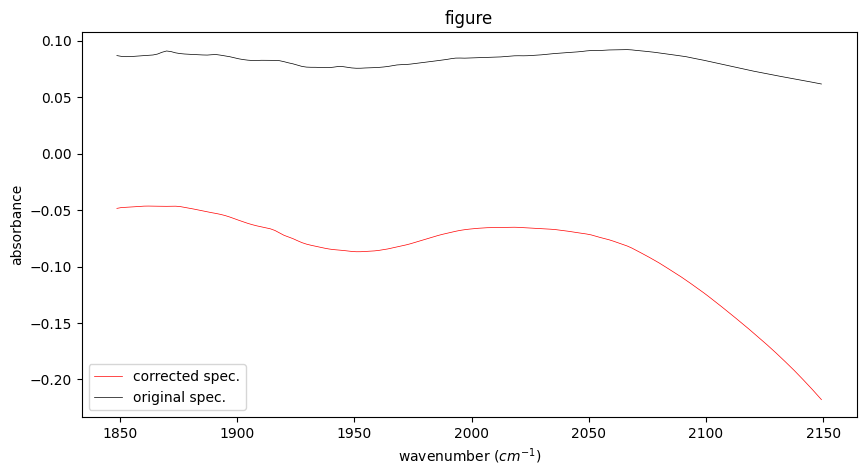

pD6_.0000_cut_range_sub_wv
pD6_.0001_cut_range_sub_wv
pD6_.0002_cut_range_sub_wv
pD6_.0003_cut_range_sub_wv
pD6_.0004_cut_range_sub_wv
pD6_.0005_cut_range_sub_wv
pD6_.0006_cut_range_sub_wv
pD6_.0007_cut_range_sub_wv
pD6_.0008_cut_range_sub_wv
pD6_.0009_cut_range_sub_wv
pD6_.0010_cut_range_sub_wv
pD6_.0011_cut_range_sub_wv
pD6_.0012_cut_range_sub_wv
pD6_.0013_cut_range_sub_wv
pD6_.0014_cut_range_sub_wv
pD6_.0015_cut_range_sub_wv
pD6_.0016_cut_range_sub_wv
pD6_.0017_cut_range_sub_wv
pD6_.0018_cut_range_sub_wv
pD6_.0019_cut_range_sub_wv
pD6_.0020_cut_range_sub_wv
pD6_.0021_cut_range_sub_wv
pD6_.0022_cut_range_sub_wv
pD6_.0023_cut_range_sub_wv
pD6_.0024_cut_range_sub_wv
pD6_.0025_cut_range_sub_wv
pD6_OCP.0_cut_range_sub_wv


In [4]:
sample_second_deriv, sample_raw = auto_path("../../data/opus_files/water_vapor", "../../data/output_plots/", "../../data/opus_files/pD6", "pD6", "../../data/prospecpy_config.xlsx", "hyd2_pD_6", "pD6_.0024_cut_range_sub_wv", "pD6_.0024_cut_range_sub_wv_second_deriv")

In [5]:
#anchor_point_dict, deriv_x_peak_val, anchor_points_raw_data, y_corr_abs
anchor_point_dict, deriv_x_peak_val, anchor_points_raw_data, y_corr_abs = interact(sample_second_deriv, sample_raw, 0.4, 3.13)

interactive(children=(BoundedFloatText(value=0.4, description='Threshold for peak selection(0 to 1 in 0.01 steps):', max=1.0, step=0.01), BoundedFloatText(value=3.13, description='adj for anchor point selection(0 to 5 in 0.01 steps):', max=5.0, step=0.01), Output()), _dom_classes=('widget-interact',))


interactive(children=(BoundedFloatText(value=0.4, description='Threshold for peak selection(0 to 1 in 0.01 ste…